In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("train_housing.csv", usecols=['BsmtQual', 'FireplaceQu', 'SalePrice'])

In [3]:
ds.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [4]:
# lets check the missing values
ds.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

### Note
Imputation should be done in train as well as test set. For now we will consider only the training set.

The variable BsmtQual contains only a few observations with NA (2.5), therefore, handling the missing value with Missing Categorical Imputation may not be appropriate. However, we will also perform the imputation to see how does it work on features having less NaN values.

On the other hand, the variable FireplaceQu, contains missing data in almost half of the observations. Therefore, handling the missing value with Missing Categorical Imputation is the best approach.


### For BsmtQual

In [5]:
# lets get the percentage of missing value in 'BsmtQual' columns
ds['BsmtQual'].isnull().mean()

0.025342465753424658

In [6]:
# lets calculate the number of observations per category in BsmtQual
ds['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

Text(0, 0.5, 'Number of houses')

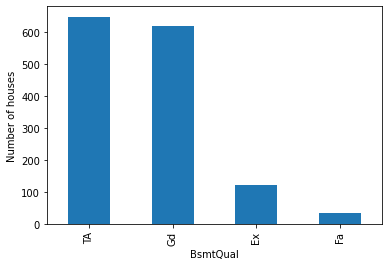

In [7]:
# let's observe the number of observations per category in BsmtQual
ds['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [9]:
# Let's fill the NaN values with a new feature 'Missing'

ds['BsmtQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

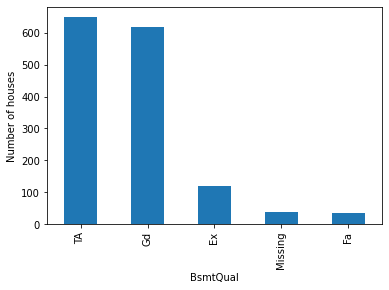

In [11]:
# let's plot the number of houses per category after imputation

ds['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

We can see a new category 'Missing'

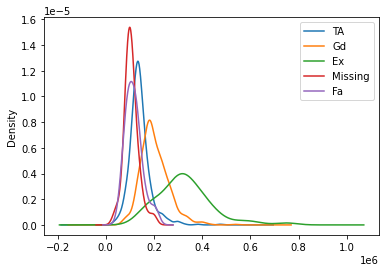

In [12]:
# let's compare the distribution of the target for the houses that shows the 
# different categories of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# a plot per category
ds[ds['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
ds[ds['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
ds[ds['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
ds[ds['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
ds[ds['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)


# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

You can see that the houses with different labels show different distributions of prices. For example, the houses with the label "Ex" tend to be the most expensive, whereas the houses that show "Missing" or "Fa" are the cheapest.

In [ ]:
# lets store the original distribution of the SalePrice in a temorary
# variable.
# This is to compare the distribution of the SalePrice after and
# before imputation


tmp = ds[ds['BsmtQual']=='TA']['SalePrice']

### For FirePlaceQu Column

In [13]:
# let's again check the percentage of null values for this feature
ds['FireplaceQu'].isnull().mean()

0.4726027397260274

Text(0, 0.5, 'Number of houses')

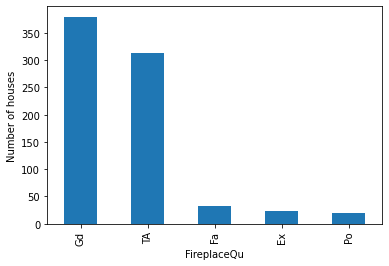

In [14]:
# let's observe the number of observations per category

ds['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [15]:
# Let's fill NaN with new category 'Missing'

ds['FireplaceQu'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

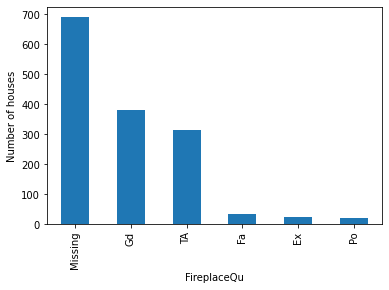

In [16]:
# let's observe the number of observations per category after imputation

ds['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

We can see the new feature 'Missing' containing all the missing values

In [19]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable
def func_plot(ds, variable, target):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in ds[variable].unique():
        ds[ds[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = ds[variable].unique()
    ax.legend(lines, labels, loc='best')
    plt.show()
        

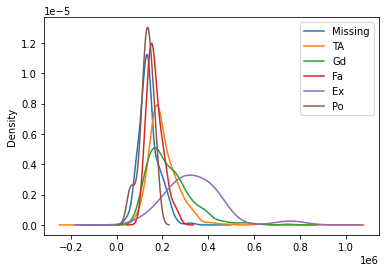

In [21]:
func_plot(ds, 'FireplaceQu', 'SalePrice')

We can see that the houses with different labels for FirePlaceQu also shows different distributions of SalePrice.


Now we have to do the same steps for test set as well.